<a href="https://colab.research.google.com/github/stellambo/Portfolio-Optimization/blob/main/volatility_and_covariance_matrix_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stella Mbousnoum : This file prepares and cleans financial data for our portfolio optimization using Markowitz theory. It retrieves historical price data, handles missing values, and computes daily returns. You can choose from three cleaning methods:

Raw Data: Uses the original data as-is.
Interpolation: Fills missing data points, ensuring no gaps in the time series.
EMA: Smooths out volatility (e.g., for Bitcoin), providing more stable return calculations.

The cleaned data is then used to compute the covariance matrix, which is essential for the Markowitz optimization model

Valeriia Charkovska: I copied the file and continued to work with the cleaned data in this file.

Stella Mbousnoum : added functions for the optimisation

Import useful Libraries for data cleaning ( will create an importfile for all the useful libraries )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# **what you'll need for our covariance matrix**

daily_returns or daily_returns_interpolate or daily_returns_ema (depends which approach you use , i recommend to use them all...)

# 3 Approaches for my data cleaning :choose the one you find more relevant ( i recommend interpolation or Ema , cf documentation in project evolution)
"Raw" data
/Interpolation helps fill in missing data for tickers that don't trade 24/7, ensuring no gaps in the time series, which is necessary for consistent return calculations.
/EMA smooths out Bitcoin's volatility, allowing you to calculate returns that reflect the overall trend without being overly influenced by erratic price movements.

**Approach 1**
Problem : btc is defined 24/7 and others not on business days .Is this approach accurate ?

In [ ]:
tickers=['SAN.PA','MSFT','FSLR','GLD','BTC-USD'] #Sanofi , microsoft , bitcoin,first solar , gold
#help(yf.download)
data=yf.download(tickers,start="2019-12-31",end="2025-01-01")['Adj Close'] # ** "Adj Close" gives a more accurate historical picture of a stock's price, considering dividend payments, splits, and other corporate actions
dataf=data.ffill()
dataf.drop('2019-12-31')
# Check if any NaN values exist in the entire DataFrame
print(dataf.isna().sum())
daily_returns = dataf.pct_change()

[*********************100%***********************]  5 of 5 completed


KeyError: 'Adj Close'

In [ ]:
dataf.head(20)
daily_returns.head(40)

**Approach 2 **: More accurate? , Filling Missing Data:  estimate missing values  maintaining **continuity**(very important)
reduce abrupt changes

Valeriia: I decided to work with interpolation method, but preliminary I managed the error connected with "KeyError: 'Adj Close"

In [ ]:
tickers = ['SAN.PA', 'MSFT', 'FSLR', 'GLD', 'BTC-USD']
data = yf.download(tickers, start="2019-12-31", end="2025-01-01")

#print(data.head()) to check up the imported

if 'Adj Close' in data:
    data = data['Adj Close']
else:
    data = data['Close']

[*********************100%***********************]  5 of 5 completed


In [ ]:
interpolated_data = data.interpolate(method='polynomial',order=1)
# Drop the first row
interpolated_data = interpolated_data[interpolated_data.index > '2019-12-31']
print( interpolated_data.isna().sum())# to verify if there's any nan value
interpolated_data.head(30)
daily_returns_interpolate = interpolated_data.pct_change()
#for ticker in tickers:
   # interpolated_data[f'{ticker}_daily_returns'] = interpolated_data[ticker].pct_change()
interpolated_data.head(30)
daily_returns_interpolate.head(30)

Ticker
BTC-USD    0
FSLR       0
GLD        0
MSFT       0
SAN.PA     0
dtype: int64


Ticker,BTC-USD,FSLR,GLD,MSFT,SAN.PA
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.029819,0.011307,0.003660,0.009173,0.003336
2020-01-03,0.051452,-0.003843,0.013269,-0.012452,0.006207
2020-01-04,0.008955,-0.006957,0.003497,0.000862,0.002093
2020-01-05,0.000089,-0.007005,0.003484,0.000861,0.002089
2020-01-06,0.048291,-0.007055,0.003472,0.000860,0.002084
2020-01-07,0.050774,0.015046,0.003935,-0.009118,-0.003503
2020-01-08,-0.010269,0.000529,-0.007502,0.015928,0.003405
2020-01-09,-0.024851,0.000000,-0.005652,0.012493,0.007226


Comparison with the original data (visualisation)

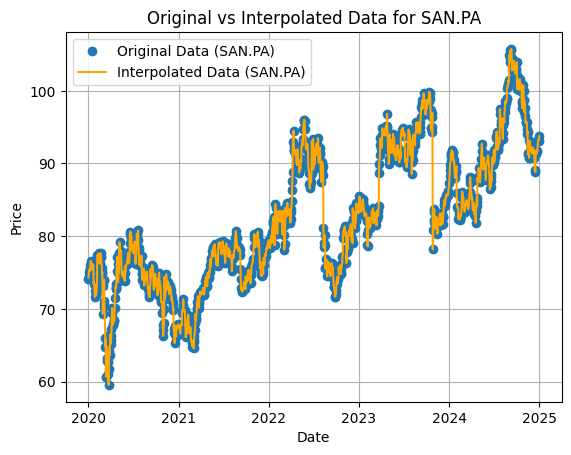

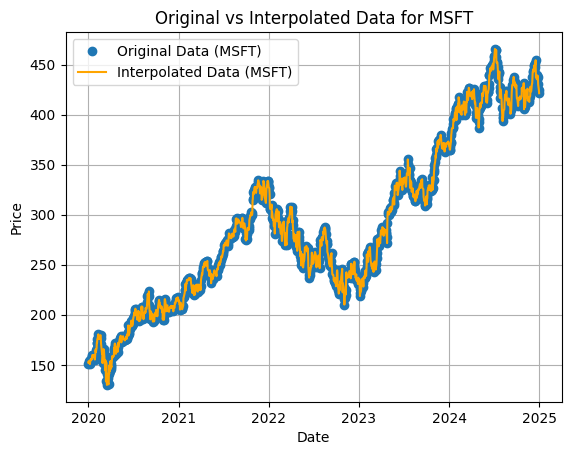

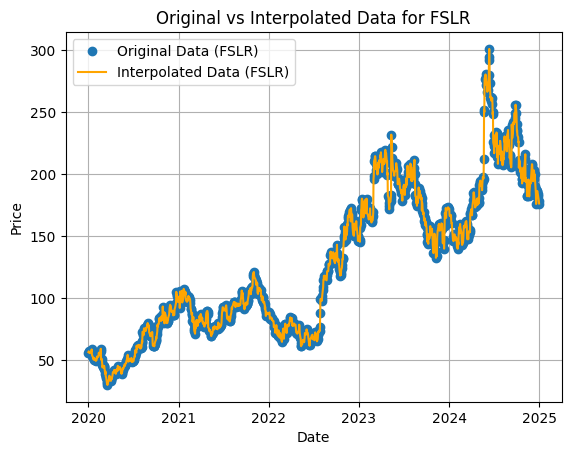

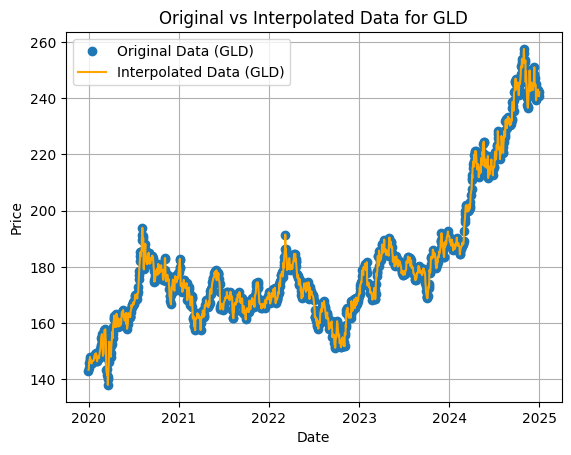

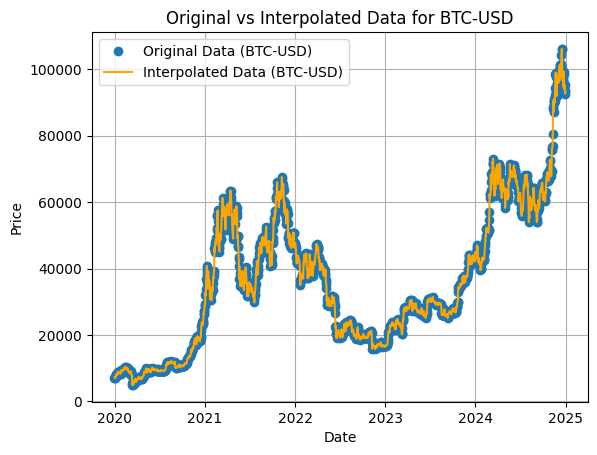

In [ ]:
for ticker in tickers :
    plt.plot(data.index, data[ticker], label=f'Original Data ({ticker})', marker='o', linestyle='None')
    plt.plot(interpolated_data.index, interpolated_data[ticker], label=f'Interpolated Data ({ticker})', linestyle='-', color='orange')
    plt.title(f'Original vs Interpolated Data for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


**Approach 3**: Simple Moving Average (SMA) calculates the average of data points over a fixed window, giving equal weight to each point, making it slow to react to recent changes. The Exponential Moving Average (EMA), on the other hand, gives more weight to recent data points, making it more responsive to price changes.

In [ ]:
#Added this section as I had an error with 'dataf' is not defined
dataf = data.ffill()
dataf = dataf.dropna()

SMA and EMA headlines
SMA: Ticker      BTC-USD  FSLR  GLD  MSFT  SAN.PA
Date                                        
2019-12-31      NaN   NaN  NaN   NaN     NaN
2020-01-01      NaN   NaN  NaN   NaN     NaN
2020-01-02      NaN   NaN  NaN   NaN     NaN
2020-01-03      NaN   NaN  NaN   NaN     NaN
2020-01-04      NaN   NaN  NaN   NaN     NaN
2020-01-05      NaN   NaN  NaN   NaN     NaN
2020-01-06      NaN   NaN  NaN   NaN     NaN
2020-01-07      NaN   NaN  NaN   NaN     NaN
2020-01-08      NaN   NaN  NaN   NaN     NaN
2020-01-09      NaN   NaN  NaN   NaN     NaN
2020-01-10      NaN   NaN  NaN   NaN     NaN
2020-01-11      NaN   NaN  NaN   NaN     NaN
2020-01-12      NaN   NaN  NaN   NaN     NaN
2020-01-13      NaN   NaN  NaN   NaN     NaN
2020-01-14      NaN   NaN  NaN   NaN     NaN 

EMA: Ticker          BTC-USD       FSLR         GLD        MSFT     SAN.PA
Date                                                                 
2019-12-31  7193.599121  55.959999  142.899994  150.837799  7

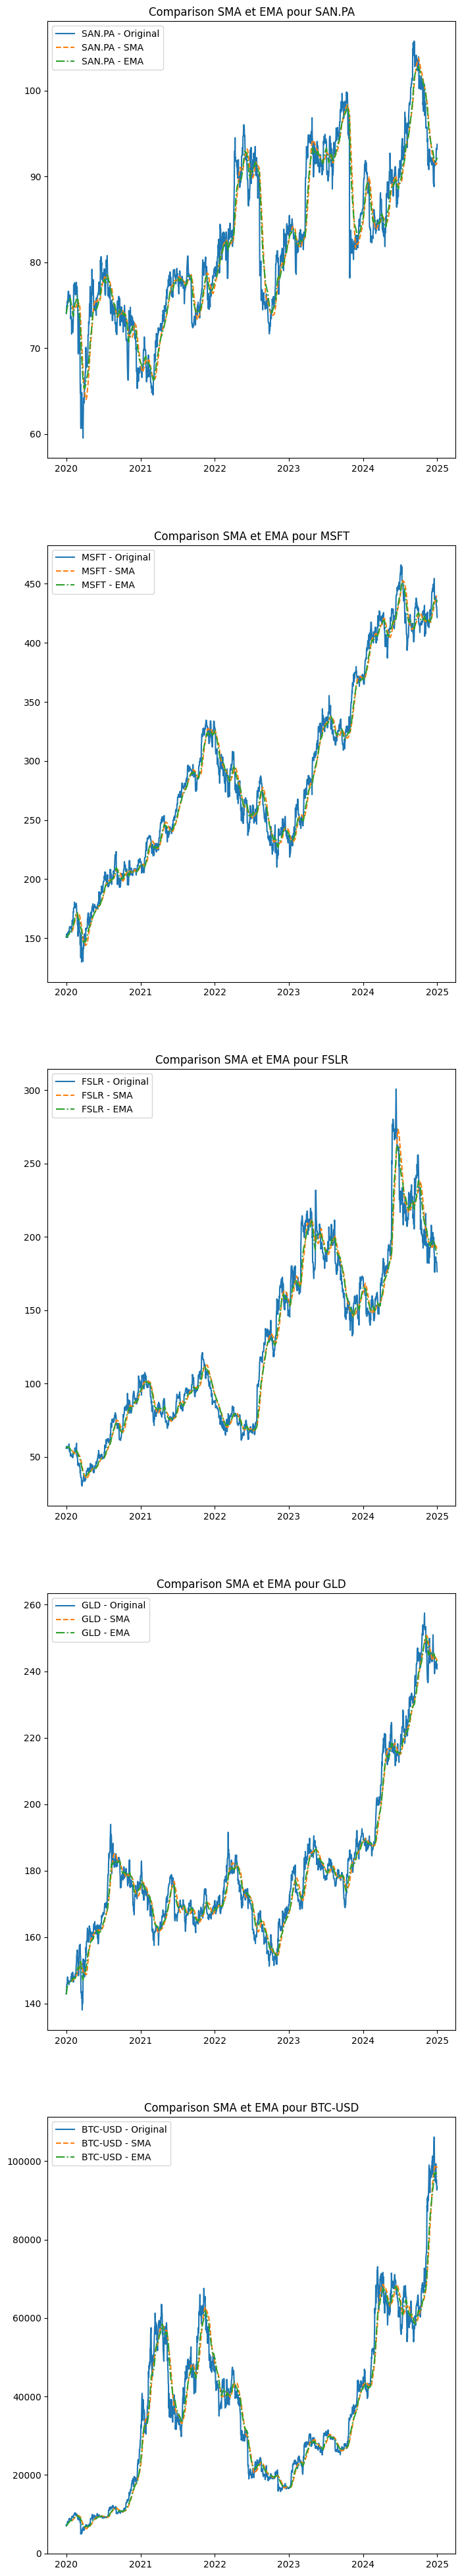

In [ ]:
# Simple moving average (SMA)
window_size =   30 # Size how many previous values are included when calculating each point in the smoothed series (cf documentation in project evolution)
sma_data = dataf.rolling(window=window_size).mean()

# Exponential Moving Average (EMA)
ema_span = 30
ema_data = dataf.ewm(span=ema_span).mean()

# First lines of dataset(EMA and SMA)
print("SMA and EMA headlines")
print("SMA:", sma_data.head(15), "\n")
print("EMA:", ema_data.head(15), "\n") #choosed this one

# Data Visualisation


# plotlib sma /ema
plt.figure(figsize=(8, 50))

for ticker in tickers:
    plt.subplot(len(tickers), 1, tickers.index(ticker) + 1)
    plt.plot(dataf[ticker], label=f"{ticker} - Original")
    plt.plot(sma_data[ticker], label=f"{ticker} - SMA", linestyle='--')
    plt.plot(ema_data[ticker], label=f"{ticker} - EMA", linestyle='-.')
    plt.title(f"Comparison SMA et EMA pour {ticker}")
    plt.legend(loc='upper left')

#plt.tight_layout()
plt.show()

In [ ]:
daily_returns_ema = ema_data.pct_change() #calculating the daily percentage returns based on the EMA smoothed data
daily_returns_ema.head(20)

Ticker,BTC-USD,FSLR,GLD,MSFT,SAN.PA
Date,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN
2020-01-01,0.000472,0.000000,0.000000,0.000000,0.000000
2020-01-02,-0.010457,0.008138,0.002614,0.006588,0.002382
2020-01-03,0.008633,0.002953,0.004974,-0.000206,0.002903
2020-01-04,0.007204,0.001761,0.002961,-0.000124,0.001732
2020-01-05,0.004768,0.001168,0.001961,-0.000082,0.001148
2020-01-06,0.011890,-0.002797,0.003220,0.000389,0.001907
2020-01-07,0.017135,0.000223,0.003019,-0.001136,0.000868
2020-01-08,0.011424,0.000248,0.001237,0.001384,0.001160


##Volatility calculations

Calculating the standard deviation of a given asset returns. It's calculated over a fixed time period, generally over the day/month/year.

In [ ]:
daily_returns_ema = ema_data.pct_change().dropna() #preparing the data

volatility = daily_returns_ema.std()
print(f"Daily Volatility: {volatility} ")


Daily Volatility: Ticker
BTC-USD    0.006588
FSLR       0.005122
GLD        0.001374
MSFT       0.002323
SAN.PA     0.002057
dtype: float64 


In [ ]:
annualized_volatility = volatility * (252 ** 0.5)
print(f"Annualized Volatility: {annualized_volatility}")

Annualized Volatility: Ticker
BTC-USD    0.104579
FSLR       0.081313
GLD        0.021808
MSFT       0.036871
SAN.PA     0.032653
dtype: float64


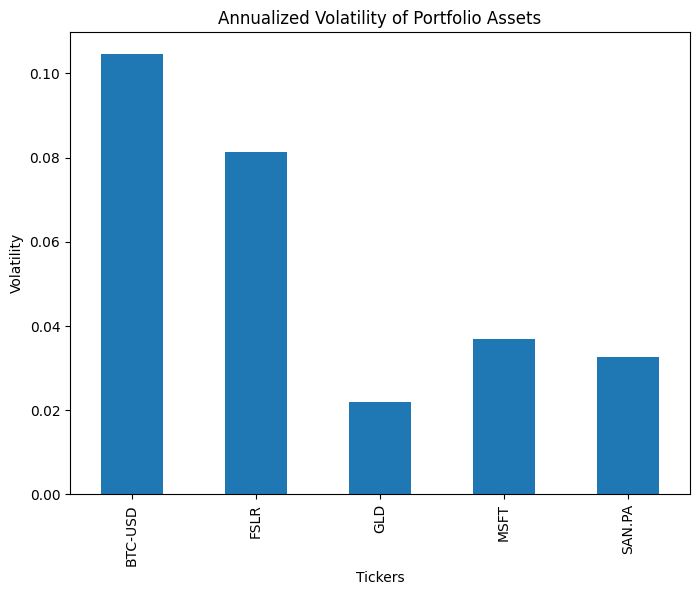

In [ ]:
#Visualisation
annualized_volatility.plot(kind='bar', title='Annualized Volatility of Portfolio Assets', figsize=(8, 6))
plt.ylabel('Volatility')
plt.xlabel('Tickers')
plt.show()

##Covariance matrix

In [ ]:
c_matrix = daily_returns_ema.cov()
print("Covariance Matrix:")
print(c_matrix)

Covariance Matrix:
Ticker        BTC-USD          FSLR           GLD          MSFT        SAN.PA
Ticker                                                                       
BTC-USD  4.339996e-05  7.351048e-06  1.362755e-06  5.360927e-06 -5.167059e-08
FSLR     7.351048e-06  2.623747e-05  1.295541e-06  3.958716e-06  1.941729e-07
GLD      1.362755e-06  1.295541e-06  1.887211e-06  6.614610e-07  4.211227e-07
MSFT     5.360927e-06  3.958716e-06  6.614610e-07  5.394737e-06  5.236542e-07
SAN.PA  -5.167059e-08  1.941729e-07  4.211227e-07  5.236542e-07  4.230928e-06


In [ ]:
annualized_cov_matrix = c_matrix * 252
print("Annualized Covariance Matrix:")
print(annualized_cov_matrix)

Annualized Covariance Matrix:
Ticker    BTC-USD      FSLR       GLD      MSFT    SAN.PA
Ticker                                                   
BTC-USD  0.010937  0.001852  0.000343  0.001351 -0.000013
FSLR     0.001852  0.006612  0.000326  0.000998  0.000049
GLD      0.000343  0.000326  0.000476  0.000167  0.000106
MSFT     0.001351  0.000998  0.000167  0.001359  0.000132
SAN.PA  -0.000013  0.000049  0.000106  0.000132  0.001066


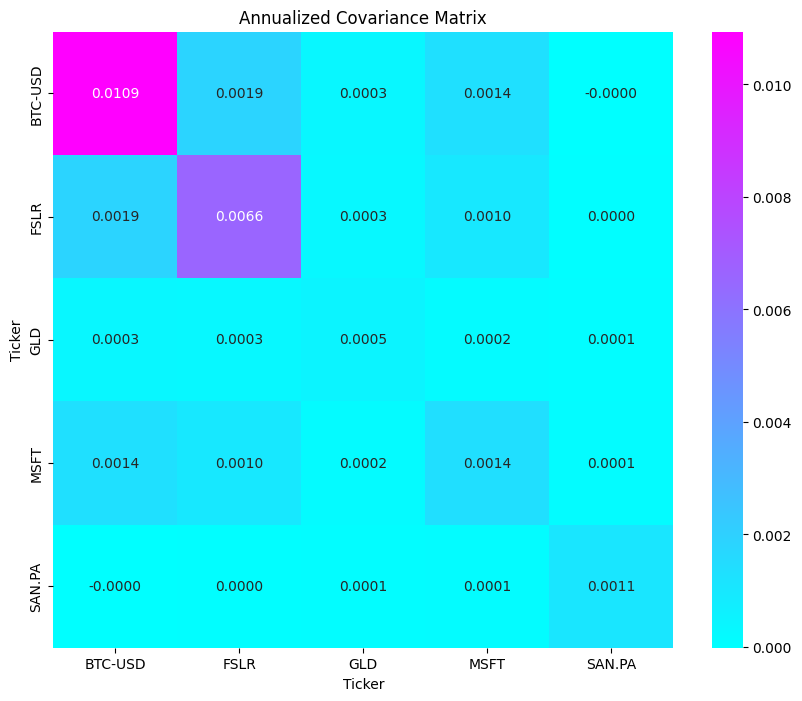

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(annualized_cov_matrix, annot=True, fmt=".4f", cmap="cool")
plt.title("Annualized Covariance Matrix")
plt.show()

##Portfolio variance

In [ ]:
weights = [1 / len(tickers)] * len(tickers)
portfolio_variance = np.dot(weights, np.dot(annualized_cov_matrix, weights))
print(f"Portfolio Variance: {portfolio_variance}")


Portfolio Variance: 0.001242922085832713


5

In [ ]:
portfolio_std_dev = np.sqrt(portfolio_variance)
print(f"Portfolio Standard Deviation (Volatility): {portfolio_std_dev}")

Portfolio Standard Deviation (Volatility): 0.0352551001393091


Portfolio optimisation
Variable names :
gen_init_weights
portfolio_return
portfolio_variance
portfolio_risk
pf_returns: A list of returns for all generated random portfolios.
pf_volatilities: A list of volatilities for all generated random portfolios


In [ ]:
portfolio_return=np.sum(daily_returns_ema.mean()*init_weights)
portfolio_return

0.0005403684367904972

In [ ]:
portfolio_variance=np.dot(init_weights.T, np.dot(c_matrix,init_weights))
portfolio_risk=np.sqrt(np.dot(init_weights.T, np.dot(c_matrix,init_weights)))
portfolio_risk

0.0019050733465285036

Portfolio returns: [0.00086503 0.00064201 0.00059413 ... 0.00060674 0.00048413 0.00088002]
Portfolio volatilities: [0.00319508 0.00216148 0.00210744 ... 0.0020779  0.00223207 0.0032586 ]


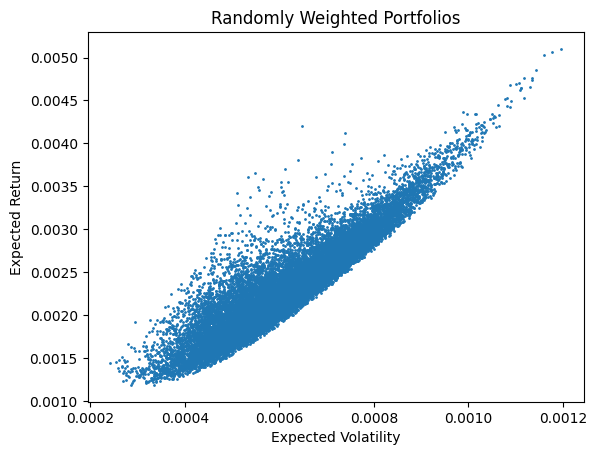

Ticker,BTC-USD,FSLR,GLD,MSFT,SAN.PA
Date,,,,,
2020-01-01,0.000472,0.000000,0.000000,0.000000,0.000000
2020-01-02,-0.010457,0.008138,0.002614,0.006588,0.002382
2020-01-03,0.008633,0.002953,0.004974,-0.000206,0.002903
2020-01-04,0.007204,0.001761,0.002961,-0.000124,0.001732
2020-01-05,0.004768,0.001168,0.001961,-0.000082,0.001148
2020-01-06,0.011890,-0.002797,0.003220,0.000389,0.001907
2020-01-07,0.017135,0.000223,0.003019,-0.001136,0.000868
2020-01-08,0.011424,0.000248,0.001237,0.001384,0.001160
2020-01-09,0.005459,0.000197,0.000227,0.002768,0.001885


In [ ]:

# Function to generate initial weights for assets
def gen_init_weights(n_assets):
    """
    Param : n_assets : number of assets
    Return : random weights for assets (sum = 1)
    """
    weights = np.random.random(n_assets)
    weights /= np.sum(weights)  # Normalize the weights so that their sum is 1
    return weights

# Portfolio return calculation
def portfolio_return(daily_returns_ema, init_weights):
    """
    Calculate the average return of a portfolio given its weights and asset returns.
    """
    return np.sum(daily_returns_ema.mean() * init_weights)  # Weighted sum of the average returns

# Portfolio risk (volatility) calculation
def portfolio_risk(init_weights, c_matrix):
    """
    Calculate the risk (volatility) of a portfolio based on initial weights and the covariance matrix.
    """
    return np.sqrt(np.dot(init_weights.T, np.dot(c_matrix, init_weights)))  # Volatility calculation

# Portfolio variance calculation
def portfolio_variance(init_weights, c_matrix):
    """
    Calculate the variance of a portfolio based on the weights and covariance matrix.
    """
    return np.dot(init_weights.T, np.dot(c_matrix, init_weights))  # Variance calculation

# Function to evaluate a random portfolio
def evaluate_random_portfolio(daily_returns_ema):
    """
    Calculate the return and risk of a random portfolio.
    """
    # Generate random weights
    init_weights = gen_init_weights(daily_returns_ema.shape[1])

    # Calculate the portfolio return and risk
    portfolio_ret = portfolio_return(daily_returns_ema, init_weights)
    portfolio_vol = portfolio_risk(init_weights, daily_returns_ema.cov())

    return portfolio_ret, portfolio_vol

# Function to create multiple random portfolios
def create_random_portfolios(daily_returns_ema, n_portfolios=1500):
    """
    Create and evaluate multiple random portfolios.
    """
    pf_returns, pf_volatilities = np.column_stack([evaluate_random_portfolio(daily_returns_ema) for _ in range(n_portfolios)])

    return pf_returns, pf_volatilities

# Create random portfolios
pf_returns, pf_volatilities = create_random_portfolios(daily_returns_ema, n_portfolios=20000)

# Display portfolio returns and volatilities
print("Portfolio returns:", pf_returns)
print("Portfolio volatilities:", pf_volatilities)

# scatter plot for expected return and volatility
plt.plot(pf_returns, pf_volatilities, 'o', markersize=1)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Randomly Weighted Portfolios')
plt.show()
daily_returns_ema.head(20)